In [1]:
import pandas as pd 

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')


In [3]:
iris
#iris.head() # the top list 
iris.tail(10) # the bottom of the list 

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
iris.shape

(150, 5)

In [5]:
iris.describe() # only gives numerical columns and count and mean and distribution info 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris ['species'].value_counts() # count the species and each value and count 

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [7]:
iris['species'].nunique() # tells how many unique values 

3

# Run these above lines of code on data ALWAYS 

In [8]:
#TO USE datadotworld PACKAGE:
#1. create account at data.world, then run the next two lines:
#2. in terminal/powershell: pip install datadotworld[pandas]
#
#   IF THIS DOESN'T WORK BC YOU GET AN ERROR ABOUT "CCHARDET", RUN:
#    conda install -c conda-forge cchardet
#   THEN RERUN: pip install datadotworld[pandas] 
#
#3. in terminal/powershell: dw configure          
#3a. copy in API token from data.world (get from settings > advanced)

import datadotworld as dw
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


baby_names = dw.load_dataset('nkrishnaswami/us-ssa-baby-names-national')
baby_names = baby_names.dataframes['names_ranks_counts']

In [9]:
baby_names
baby_names.head(10)
baby_names.shape

#look at number variables 
baby_names.describe()

#look at category variables 
baby_names['sex'].nunique()
baby_names['sex'].value_counts() #this isn't 50/50!...but thats ok 
baby_names['year'].value_counts()

2008    35070
2007    34950
2009    34702
2006    34082
2010    34067
2011    33903
2012    33732
2013    33269
2014    33228
2015    33098
2016    32979
2005    32546
2017    32469
2004    32046
2018    32033
2003    31183
2002    30563
2001    30269
2000    29769
1999    28550
1998    27899
1997    26971
1996    26423
1995    26080
1994    25995
1993    25966
1992    25427
1991    25105
1990    24719
1989    23773
        ...  
1909     4227
1908     4018
1907     3948
1900     3730
1905     3655
1906     3633
1904     3560
1903     3389
1902     3362
1898     3264
1901     3153
1896     3091
1895     3049
1899     3042
1897     3028
1894     2941
1892     2921
1893     2831
1890     2695
1891     2660
1888     2651
1889     2590
1886     2392
1887     2373
1884     2297
1885     2294
1882     2127
1883     2084
1880     2000
1881     1935
Name: year, Length: 139, dtype: int64

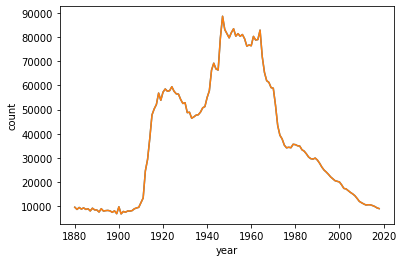

In [10]:
#lets count johns over time 

somenames = baby_names.loc[baby_names['name'] =='John'   ]
combines = somenames.groupby(['name', 'year']) ['count'].sum(). reset_index() # this has split the dataset up 
sns.lineplot(data=combines,x='year', y='count')
# turn year into a variable!

combines 
sns.lineplot(data=combines, x='year', y='count')

In [11]:
#arya and sansa 

somenames = (baby_names.loc[baby_names['name'] =='Arya'   ]

#make life easier
# | means "or" to pandas 

#names_i_want = (baby_names ['name'] == 'Sansa') | (baby_names ['names'] == 'Arya')
#names_i_want.sum

SyntaxError: unexpected EOF while parsing (<ipython-input-11-d06d9c30ba13>, line 9)

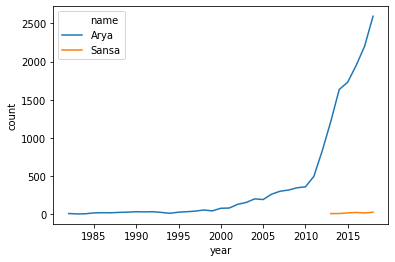

In [12]:
#Query!!!

somenames = baby_names.query('name in ["Arya", "Sansa"]') # query needs a string with t/f conditions 
combined = somenames.groupby(['name','year'])['count'].sum().reset_index()
sns.lineplot(data=combined, x='year',y='count', hue='name')

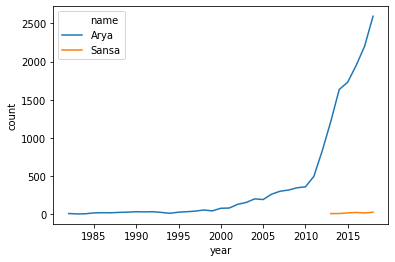

In [13]:
# i don't want "somenames"

( # perenthesis mean everything in the middle...is one line of code 
baby_names
    .query('name in ["Arya", "Sansa"]')  # get a subsample 
    .groupby (['name', 'year']) ['count'].sum().reset_index() 
    .pipe( #"pipe" in function to aply to this object 
           # syntax: <function>, arg 1, arg 2, .....
        (sns.lineplot,'data'), # call the fucntion and tell it tha 
                              # the object in memory goes to the parameter 'data'
        x='year', y='count', hue='name')
)

Text(0.5, 1.0, 'WOW THAT WAS EASY TO WRITE AND SHARE')

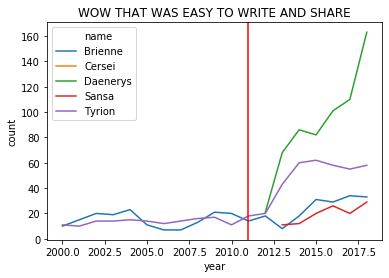

In [14]:
(baby_names
      .query('name in ["Sansa","Daenerys","Brienne","Cersei","Tyrion"] & \
         year >= 2000')
      .groupby(['name','year'])['count'].sum() # for each name-year, combine M and F counts
      .reset_index() # give us the column names back as they were (makes the plot call easy)
      .pipe((sns.lineplot, 'data'),hue='name',x='year',y='count')
)    
plt.axvline(2011, 0,160,color='red') # add a line for when the show debuted
plt.title("WOW THAT WAS EASY TO WRITE AND SHARE")

# Your turn - FRED data 

In [15]:
import datetime 
import pandas_datareader as pdr 

start= datetime.datetime(2010, 1, 1) # you can specify start and eend dates this way 
end = datetime.datetime(2013, 1, 27)
macro_df = pdr.data.DataReader(['GDP','CPIAUCSL'], 'fred', start, end)


macro_df.describe
macro_df.shape


(37, 2)

In [16]:
#download annual real GDP 
start= datetime.datetime(1960, 1, 1) # you can specify start and eend dates this way 
end = datetime.datetime(2018, 1, 27)
macro_df = pdr.data.DataReader(['GDPCA'], 'fred', start, end)

In [17]:
macro_df.describe()

,GDPCA
count,59.000000
mean,9846.197831
std,4666.452335
min,3259.971000
25%,5671.836000
50%,9192.134000
75%,14142.755500
max,18638.164000


In [18]:
# the average gdp percent change 
start= datetime.datetime(1960, 1, 1) # you can specify start and eend dates this way 
end = datetime.datetime(2018, 1, 27)
macro_df = pdr.data.DataReader(['CPGDPAI'], 'fred', start, end)

In [19]:
macro_df.describe() # group by decades 
# create a variable of % change 
# call a variable decade 

,CPGDPAI
count,52.000000
mean,1.748077
std,2.412670
min,-8.400000
25%,0.825000
50%,2.200000
75%,3.200000
max,5.500000
